# Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Handling missing value

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# replacing the zeroes in columns to null values

columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

In [7]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
data['Glucose'].fillna(data['Glucose'].median(),inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].median(),inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace = True)
data['Insulin'].fillna(data['Insulin'].median(),inplace = True)
data['BMI'].fillna(data['BMI'].median(),inplace = True)

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outliers

<Axes: >

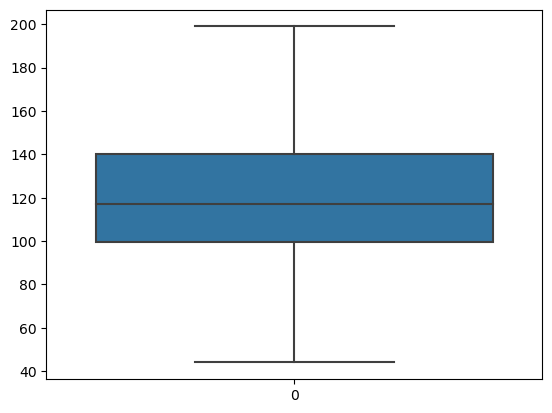

In [9]:
sns.boxplot(data['Glucose'])

<Axes: >

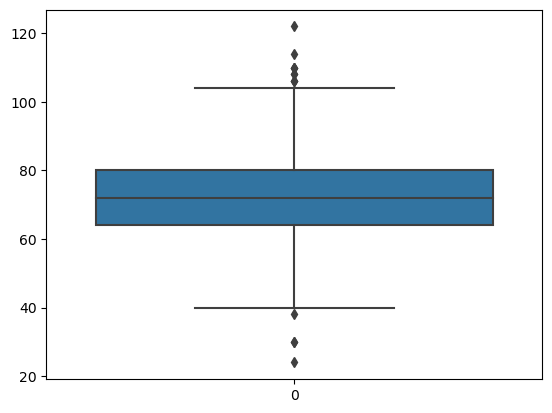

In [10]:
sns.boxplot(data['BloodPressure'])

<Axes: >

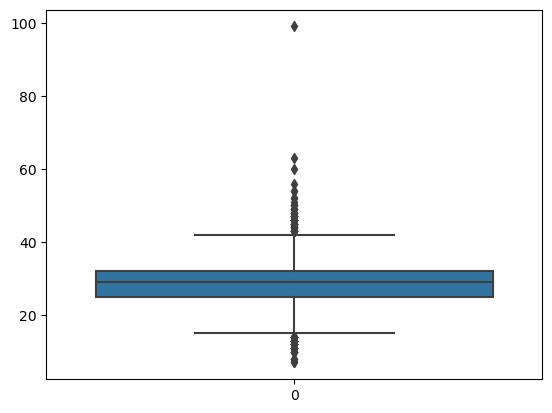

In [11]:
sns.boxplot(data['SkinThickness'])

<Axes: >

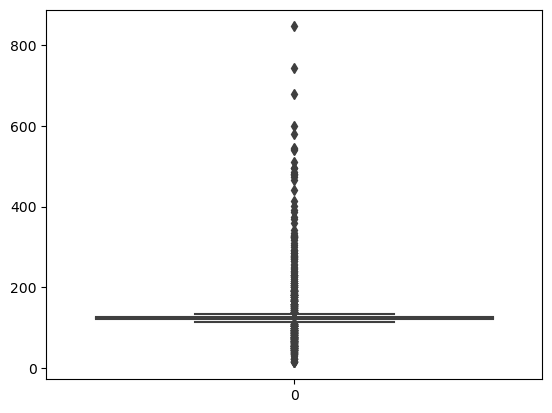

In [12]:
sns.boxplot(data['Insulin'])

<Axes: >

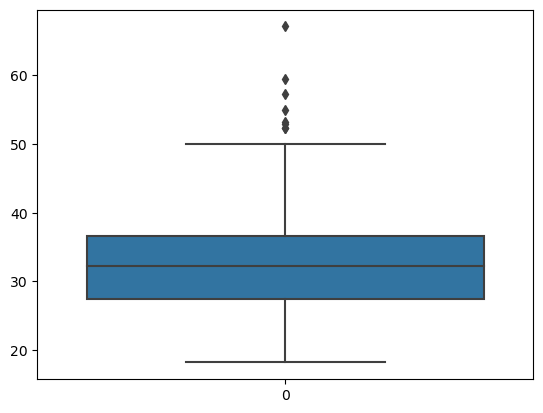

In [13]:
sns.boxplot(data['BMI'])

<Axes: >

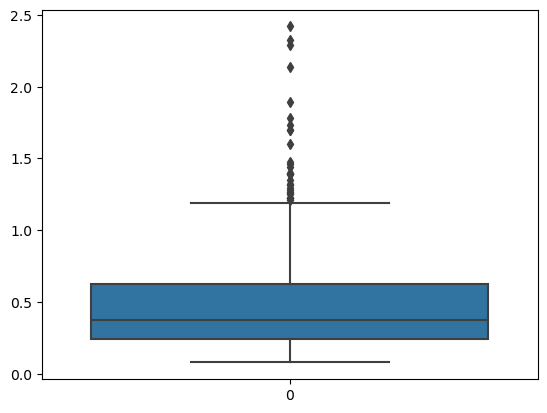

In [14]:
sns.boxplot(data['DiabetesPedigreeFunction'])

Since we need to predict whether a person has diabetes, 
and also considering the potential impact of outliers on model performance
outliers are just examined

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Splitting the dataset

In [16]:
# Defining x and y

x = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [17]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [18]:
# Train and test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
# Creating Logistic Regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [23]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [24]:
pred1 = log_reg.predict(x_test_scaled)

In [25]:
# Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
accuracy = accuracy_score(y_test, pred1)
confusion = confusion_matrix(y_test, pred1)
classification_report = classification_report(y_test, pred1)

print('Accuracy: ', accuracy)
print('Confusion matrix: ', confusion)
print('Classification report: ', classification_report)

Accuracy:  0.7532467532467533
Confusion matrix:  [[82 17]
 [21 34]]
Classification report:                precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# Prediction

In [27]:
# Inputing the new patients observation for prediction

np_preg = float(input('No. of pregnancies: '))
np_glu = float(input('Glucose level: '))
np_bp = float(input('Blood Pressure (BP): '))
np_st = float(input('Skin Thickness: '))
np_inln = float(input('Insulin : '))
np_bmi = float(input('BMI: '))
np_dpf = float(input('Diabetes Pedigree Function: '))
np_age = float(input('Age: '))

new_patient = [[np_preg, np_glu, np_bp, np_st, np_inln, np_bmi, np_dpf, np_age]]
new_patient_scaled = scaler.transform(new_patient)

check_pred = log_reg.predict(new_patient_scaled)

if check_pred[0] == 0:
    print('\nThe patient does not have diabetes')
    
else:
    print('\nThe patient have diabetes')

No. of pregnancies: 0
Glucose level: 137
Blood Pressure (BP): 40
Skin Thickness: 35
Insulin : 168
BMI: 43.1
Diabetes Pedigree Function: 2.288
Age: 33

The patient have diabetes


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Index no 4 shows the same data and the prediction is correct